## Step 8: Evaluate expression of up- and down-signature genes in Allen Brain Cell atlas

Now we'll plot the average expression values across clusters calculated in Step 8 for the up- and down-signatures in heatmaps to visualize enrichment across clusters.

In [1]:
library(ggplot2)
library(ggpubr)
library(ggsci)
library(dplyr)
library(ComplexHeatmap)
library(ggrepel)
library(ggrastr)
setwd('..') # changing the working directory to the 'EpiMemAstros' folder. Adjust as needed.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




Read in the up- and down- signature average expression matrices which we saved in the previous script:

In [2]:
up_avg_exp = read.table('outputs/mouse_atlas_corrected_up_signature_avg_expression_dataframe.csv', sep = ",", row.names = 'gene_symbol', header = 1)
down_avg_exp = read.table('outputs/mouse_atlas_corrected_down_signature_avg_expression_dataframe.csv', sep = ",", row.names = 'gene_symbol', header = 1)

Now plot the up-signature heatmap:

pdf 
  2

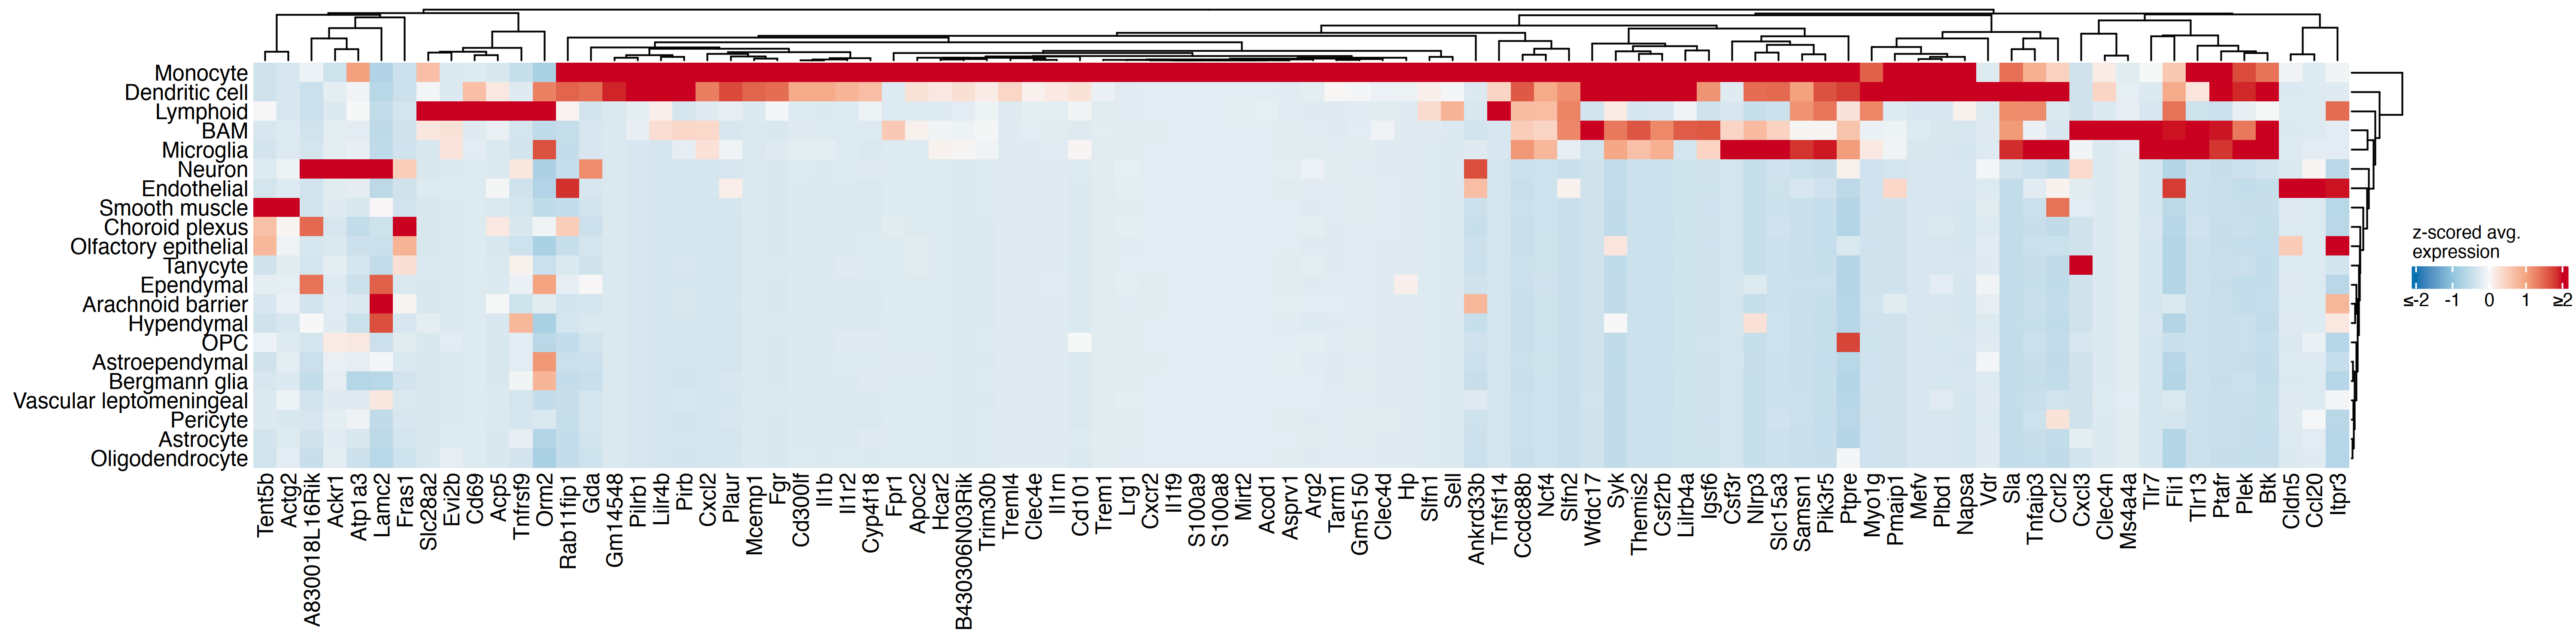

In [3]:
options(repr.plot.width=20, repr.plot.height=5, repr.plot.res = 300, warn = -1)

colnames(up_avg_exp) <- gsub('\\.', ' ', colnames(up_avg_exp))

pdf("outputs/figures/figure1c_upsignature.pdf",width=20,height=5)

ht = Heatmap(name = "z-scored avg.\nexpression", 
             scale(t(up_avg_exp)),
        col = circlize::colorRamp2(breaks = c(-2, -1, 0, 1, 2), 
                                   rev(RColorBrewer::brewer.pal(n = 5, name = "RdBu"))), 
             row_names_side = 'left', row_dend_side = 'right',
        show_column_names = TRUE, 
        column_names_gp = gpar(fontface = "italic"),
       heatmap_legend_param = list(direction="horizontal", labels = c('≤-2', '-1', '0', '1', '≥2')))

draw(ht)

dev.off()

ht

options(warn=0)

Plot the down-signature heatmap:

pdf 
  2

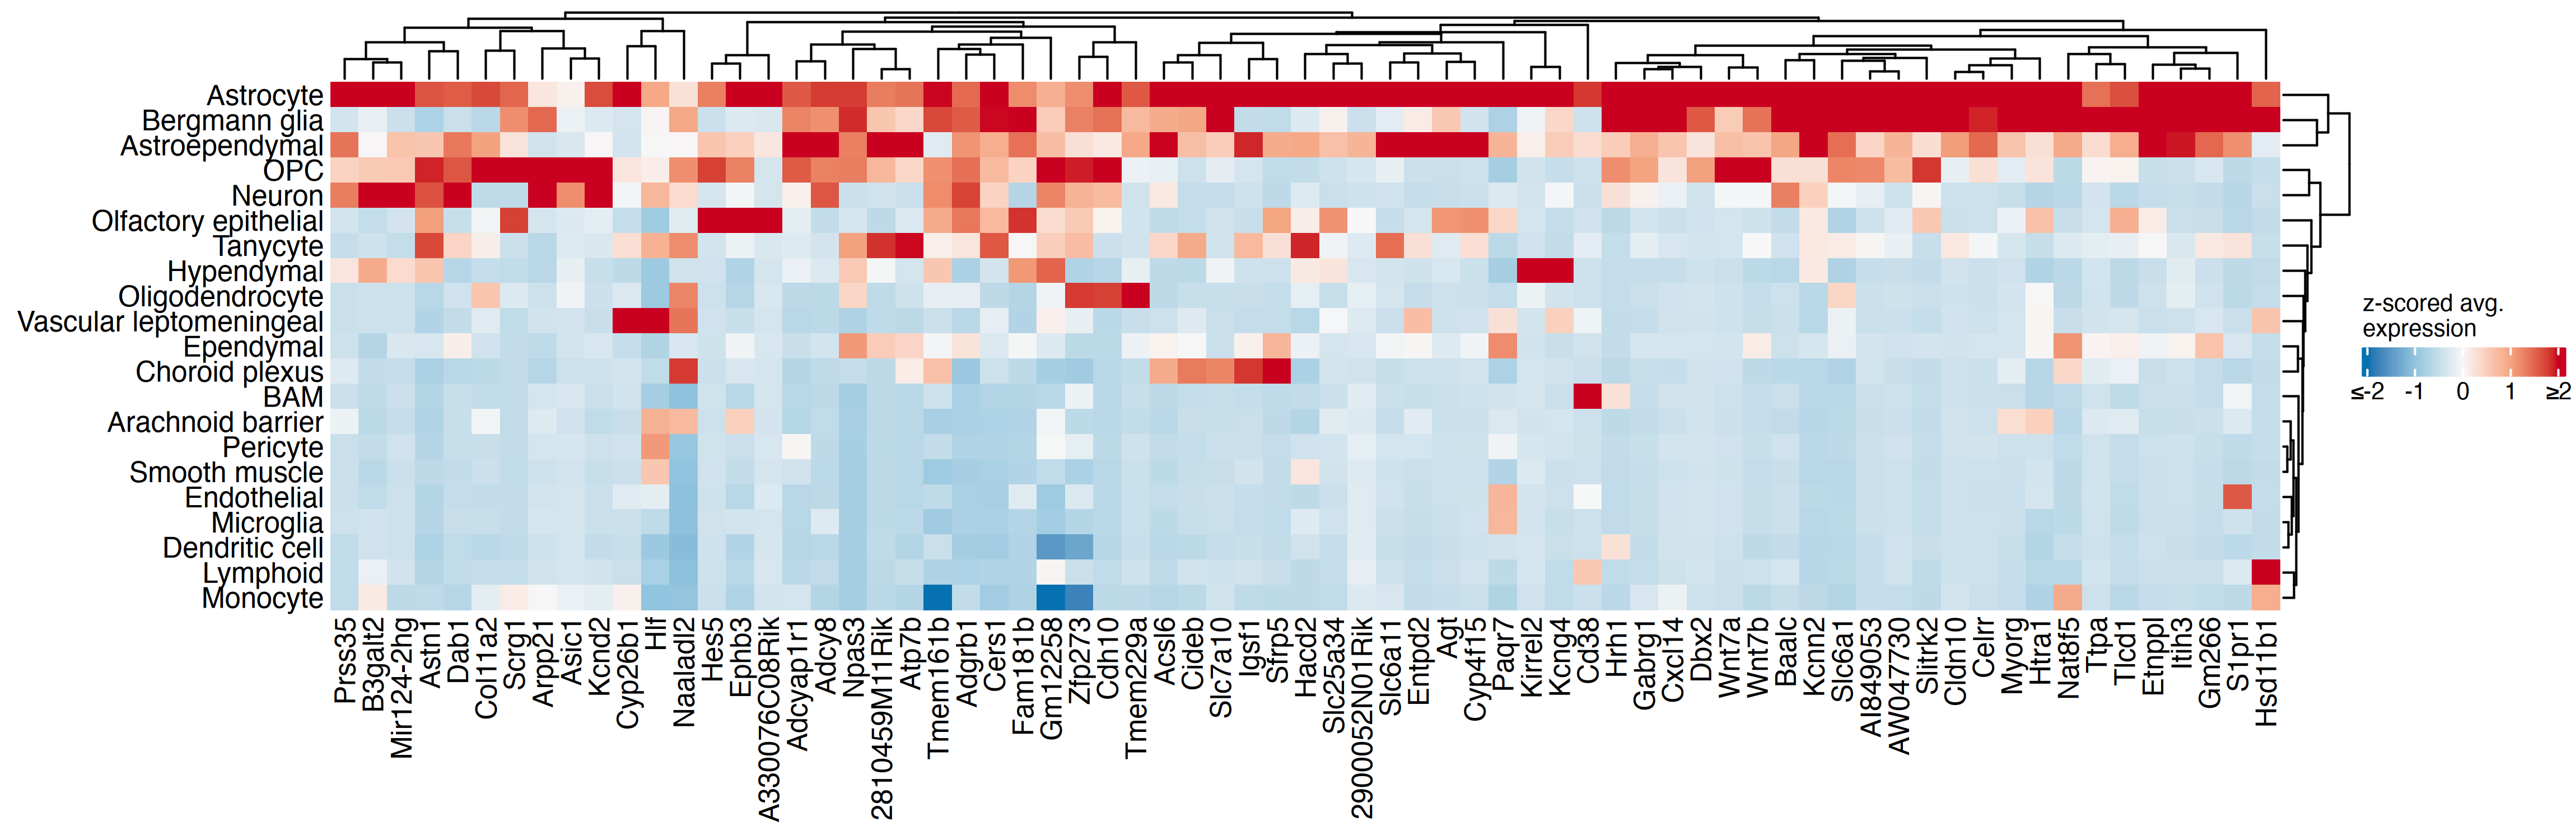

In [4]:
options(repr.plot.width=15.333, repr.plot.height=5, repr.plot.res = 300, warn = -1)

colnames(down_avg_exp) <- gsub('\\.', ' ', colnames(down_avg_exp))

pdf("outputs/figures/figure1b_downsignature.pdf",width=15.333,height=5)

ht = Heatmap(name = "z-scored avg.\nexpression", scale(t(down_avg_exp)),
        col = circlize::colorRamp2(breaks = c(-2, -1, 0, 1, 2), colors = rev(RColorBrewer::brewer.pal(n = 5, name = "RdBu"))), 
        show_column_names = TRUE, 
             row_names_side = 'left', row_dend_side = 'right',
             column_names_gp = gpar(fontface = "italic"),
       heatmap_legend_param = list(direction="horizontal", labels = c('≤-2', "-1", "0", "1", "≥2")))

draw(ht)

dev.off()

ht

options(warn=0)

Lastly, we'll plot a volcano plot of the differential expression test results between the two-hit versus one-hit cytokine stimulus conditions. 

In [5]:
IL1bTNF_2x_vs_1x = read.csv('inputs/zenodo/2x.IL1B.and.TNF.vs.1x.IL1B.dge.tsv', sep = '\t')
(IL1bTNF_2x_vs_1x %>% arrange(padj, desc(log2FoldChange)))[1:10,]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Agt,1491.2329,-2.142040,0.1411443,-15.17624,5.08e-52,7.63e-48
2,Itih3,2800.3427,-1.829055,0.1267086,-14.43513,3.11e-47,2.34e-43
3,Slc6a11,1045.4300,-1.985783,0.1461178,-13.59029,4.57e-42,2.29e-38
4,Htra1,3225.8679,-1.749910,0.1350371,-12.95874,2.10e-38,7.87e-35
5,Atp1b2,9206.4621,-1.377310,0.1106021,-12.45285,1.35e-35,4.05e-32
6,Slc7a10,1390.2406,-1.555116,0.1297651,-11.98409,4.31e-33,1.08e-29
7,Wnt7b,342.5215,-1.969866,0.1683576,-11.70049,1.27e-31,2.72e-28
8,Slc6a1,4085.7698,-1.760055,0.1516221,-11.60817,3.75e-31,7.03e-28
9,Cers1,456.2308,-1.980288,0.1708260,-11.59243,4.50e-31,7.51e-28


Warning message:
“Removed 14998 rows containing missing values or values outside the scale range (`geom_text_repel()`).”
Warning message:
“Removed 14998 rows containing missing values or values outside the scale range (`geom_text_repel()`).”


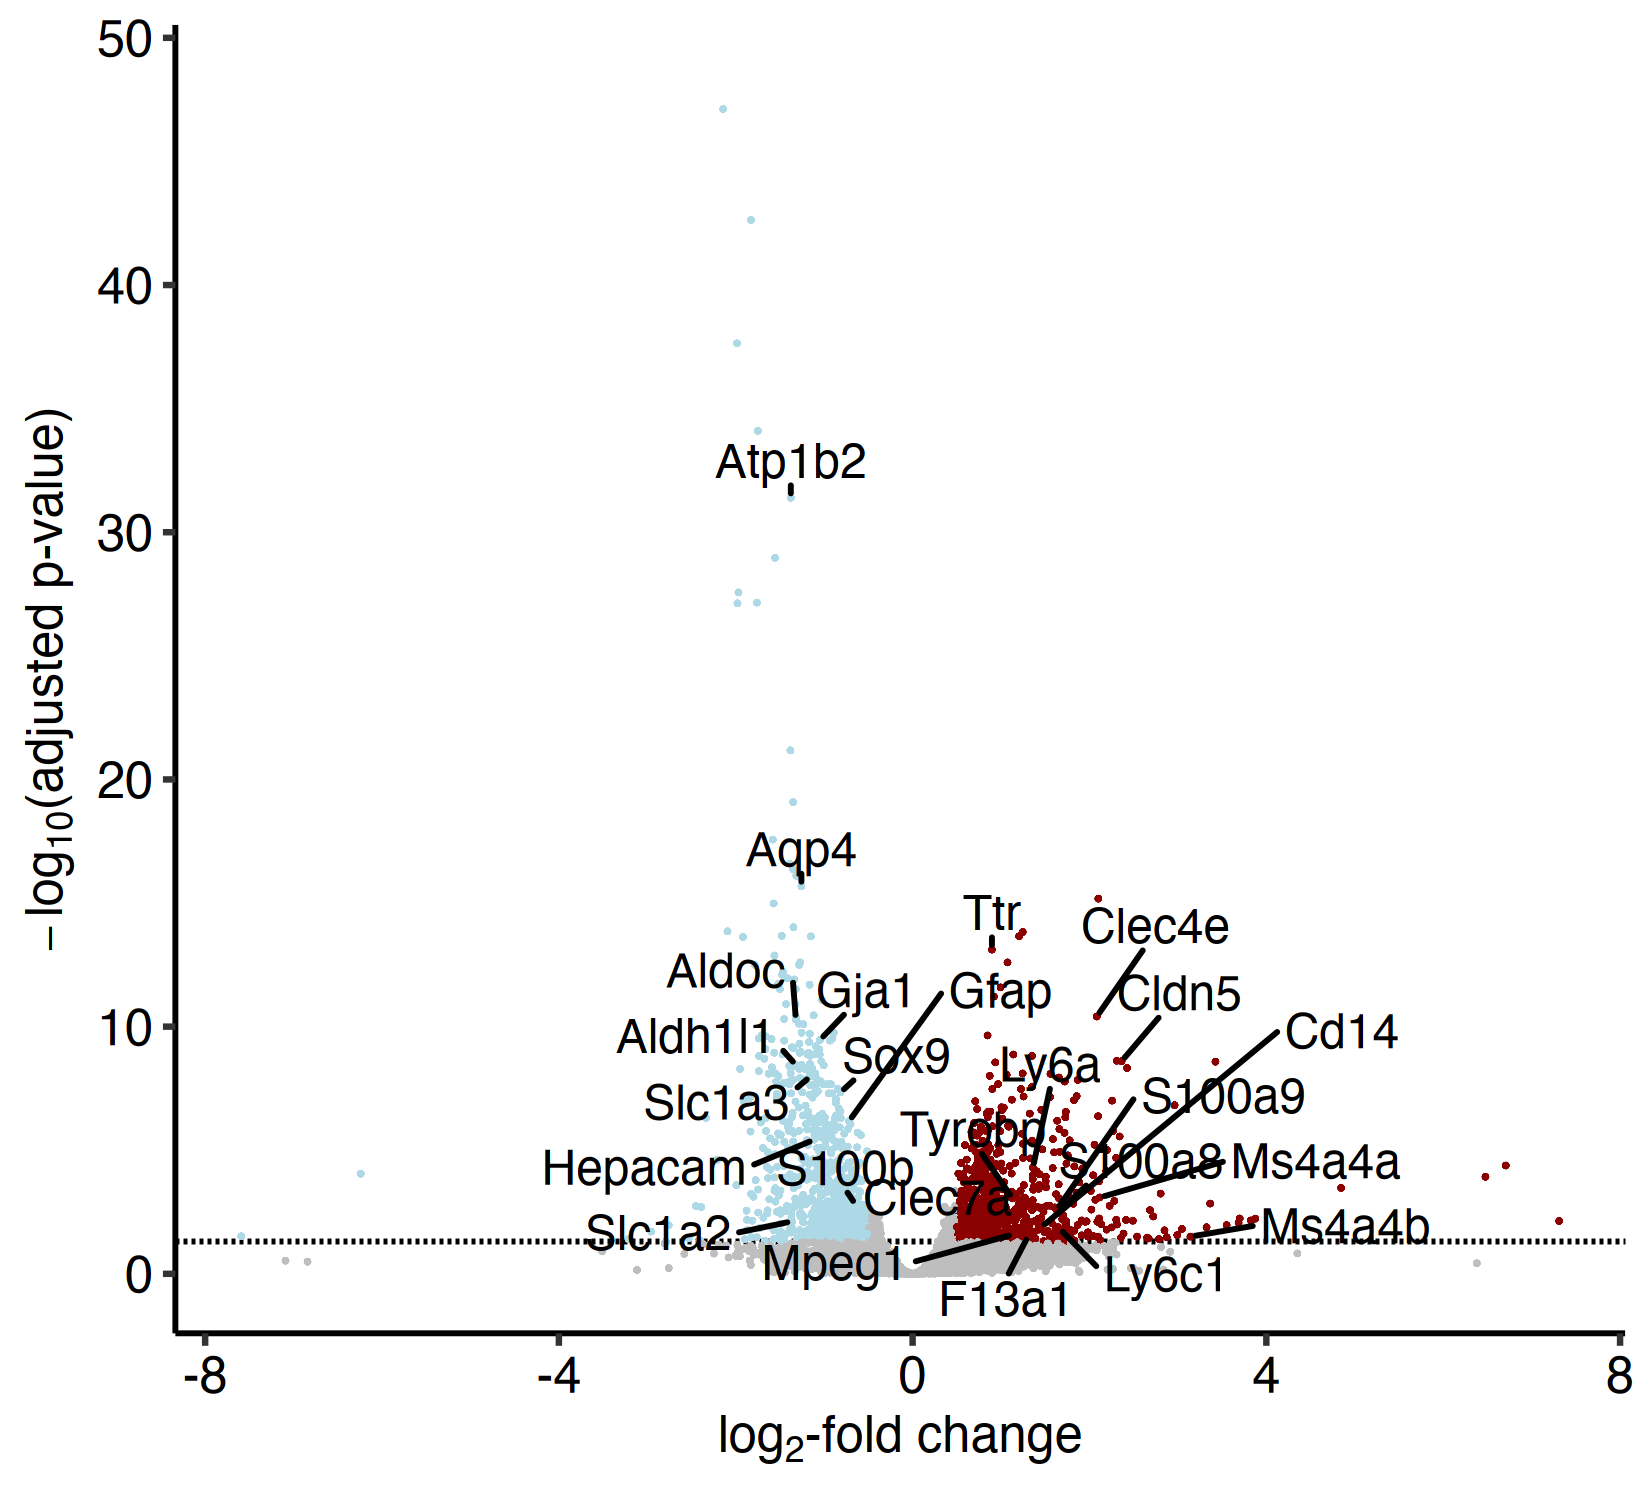

In [6]:
options(repr.plot.width=5.5, repr.plot.height=5, repr.plot.res = 300)

highlight_genes <- c('Cd14', 'Mpeg1', 'Ms4a4a', 'Ms4a4b', 'Tyrobp', 'Ly6a', 'Ly6c1', 'Clec4e', 'Clec7a', 'S100a8', 'S100a9', 'F13a1',
                     'Ttr', 'Cldn5', 
                    'Aqp4', 'Slc1a3', 'Slc1a2', 'Aldoc', 'Atp1b2', 'Gja1', 'Hepacam', 'S100b', 'Sox9', 'Aldh1l1', 'Gfap')
image = ggplot(data = IL1bTNF_2x_vs_1x %>% mutate(label = ifelse(gene %in% highlight_genes, gene, NA)) %>% 
                                                                         mutate(significance = ifelse((padj < 0.05) & (log2FoldChange > 0.5), "Up", 
                                                                                              ifelse((padj < 0.05) & (log2FoldChange < -0.5), "Down",
                                                                                                    "NS"))), 
       aes(x = log2FoldChange, y = -log10(padj), label = label, color = significance)) +
  geom_hline(yintercept = -log10(0.05), col = "black", linetype = 'dashed') + 
  rasterize(geom_point(size = 0.1), dpi = 1200) + 
    labs(x = expression(paste(log[2],"-fold change")), y = expression(paste(-log[10], "(adjusted p-value)"))) + 
    scale_color_manual(values = c('lightblue', 'gray', 'darkred'), guide = NULL) + 
     geom_text_repel(max.overlaps = Inf, segment.color = "black",
                    nudge_y = 1, 
                     min.segment.length = 0, 
                     fontface = 'italic',
                     color = "black",
                     size = 4) +  
    theme_pubr() + 
    #scale_x_continuous(lim = c(-5, 5)) + 
  theme(
              axis.title.y = element_text(size = 12),
              axis.title.x = element_text(size=12)
            )

ggsave(file="outputs/figures/figure1a.svg", plot=image, width=5.5, height=5)

image

In [7]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/liddelowlab/mambaforge/envs/EpiMemAstros/lib/libopenblasp-r0.3.28.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: system (macOS)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggrastr_1.0.2         ggrepel_0.9.6         ComplexHeatmap_2.18.0
[4] dplyr_1.1.4           ggsci_3.2.0           ggpubr_0.6.0         
[7] ggplot2_3.5.1        

loaded via a namespace (and not attached):
 [1] gtable_0.3.6        beeswarm_0.4.0      circlize_0.4.16    
 [4] shape_1.4.6.1       rjson_0.2.23        GlobalOptions_0.1.2
 [7] rstatix_0.7.2       Cairo_1.6-2         vctrs_0.6.5        
[10] tools_4.3.3         generics_0.1.3      stats4_4.3.3       
[1

In [8]:
version

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             